<h2 style="color:green;">US Accidents Visualizations</h2>

In [42]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from tqdm import tqdm
import plotly.graph_objects as go

In [14]:
warnings.filterwarnings('ignore')

In [16]:
low_memory=False

In [9]:
df=pd.read_csv('goldlayerUSAccidents.csv')

In [29]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Bin,Accident_Duration,count
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,0,0,0,0,0,0,0,Rainy,314.0,1
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,0,0,0,0,0,0,1,Rainy,30.0,1
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,0,1,0,0,0,1,1,Other,30.0,1
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,0,0,0,0,1,1,1,Cloudy,30.0,1
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,0,1,0,1,1,1,1,Cloudy,30.0,1


<h1 style="color:green;">Distribution of accidents by severity</h1>


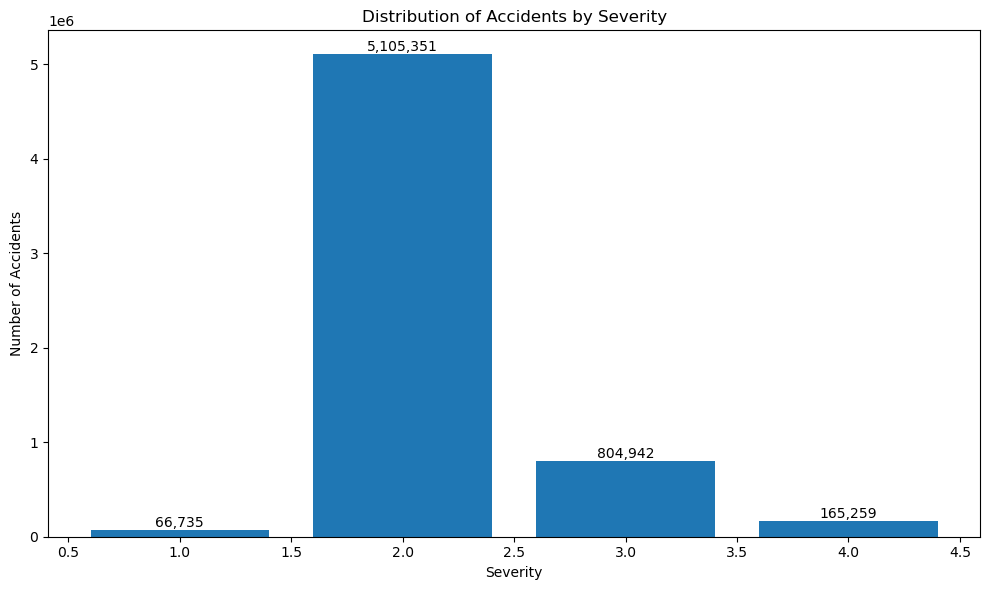

In [31]:
# Group by severity and count accidents
severity_counts = df['Severity'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(severity_counts.index, severity_counts.values)

plt.title('Distribution of Accidents by Severity')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

Scatter plot to show the relationship between accident duration and distance

<h1 style="color:blue;">Top 10 Cities with Most Accidents</h1>
<h2 style="color:orange;">BAR CHART</h2>


Processing chunks:  16%|█▌        | 10/62 [00:11<01:01,  1.18s/it]

Processed 10 chunks out of 62


Processing chunks:  32%|███▏      | 20/62 [00:23<00:53,  1.26s/it]

Processed 20 chunks out of 62


Processing chunks:  48%|████▊     | 30/62 [00:37<00:42,  1.34s/it]

Processed 30 chunks out of 62


Processing chunks:  65%|██████▍   | 40/62 [00:49<00:26,  1.21s/it]

Processed 40 chunks out of 62


Processing chunks:  81%|████████  | 50/62 [01:04<00:19,  1.65s/it]

Processed 50 chunks out of 62


Processing chunks:  97%|█████████▋| 60/62 [01:20<00:02,  1.32s/it]

Processed 60 chunks out of 62


Processing chunks: 100%|██████████| 62/62 [01:21<00:00,  1.32s/it]


Finished processing all chunks. Creating chart...


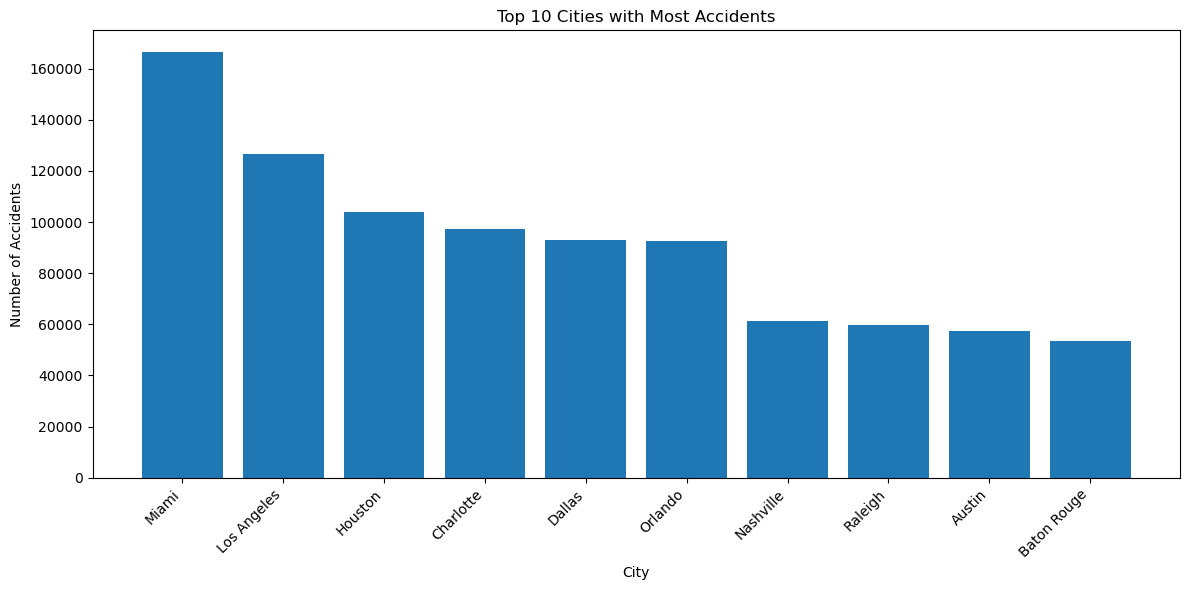

Chart created and displayed.


In [27]:
chunk_size = 100000
city_counts = {}
total_chunks = sum(1 for _ in pd.read_csv('goldlayerUSAccidents.csv', chunksize=chunk_size))

for chunk_number, chunk in enumerate(tqdm(pd.read_csv('goldlayerUSAccidents.csv', chunksize=chunk_size), total=total_chunks, desc="Processing chunks")):
    temp_counts = chunk['City'].value_counts()
    for city, count in temp_counts.items():
        city_counts[city] = city_counts.get(city, 0) + count
    if (chunk_number + 1) % 10 == 0:
        print(f"Processed {chunk_number + 1} chunks out of {total_chunks}")

print("Finished processing all chunks. Creating chart...")

top_10_cities = sorted(city_counts.items(), key=lambda x: x[1], reverse=True)[:10]
cities, counts = zip(*top_10_cities)
plt.figure(figsize=(12, 6))
plt.bar(cities, counts)
plt.title('Top 10 Cities with Most Accidents')
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Chart created and displayed.")

<h1 style="color:purple;">Top 10 Weather Conditions in Accidents</h1>
<h2 style="color:green;">PIE CHART</h2>


Processing chunks:  16%|█▌        | 10/62 [00:15<01:19,  1.52s/it]

Processed 10 chunks out of 62


Processing chunks:  32%|███▏      | 20/62 [00:30<01:02,  1.50s/it]

Processed 20 chunks out of 62


Processing chunks:  48%|████▊     | 30/62 [00:47<00:54,  1.72s/it]

Processed 30 chunks out of 62


Processing chunks:  65%|██████▍   | 40/62 [01:04<00:38,  1.77s/it]

Processed 40 chunks out of 62


Processing chunks:  81%|████████  | 50/62 [01:21<00:20,  1.69s/it]

Processed 50 chunks out of 62


Processing chunks:  97%|█████████▋| 60/62 [01:35<00:02,  1.39s/it]

Processed 60 chunks out of 62


Processing chunks: 100%|██████████| 62/62 [01:37<00:00,  1.58s/it]

Finished processing all chunks. Creating chart...


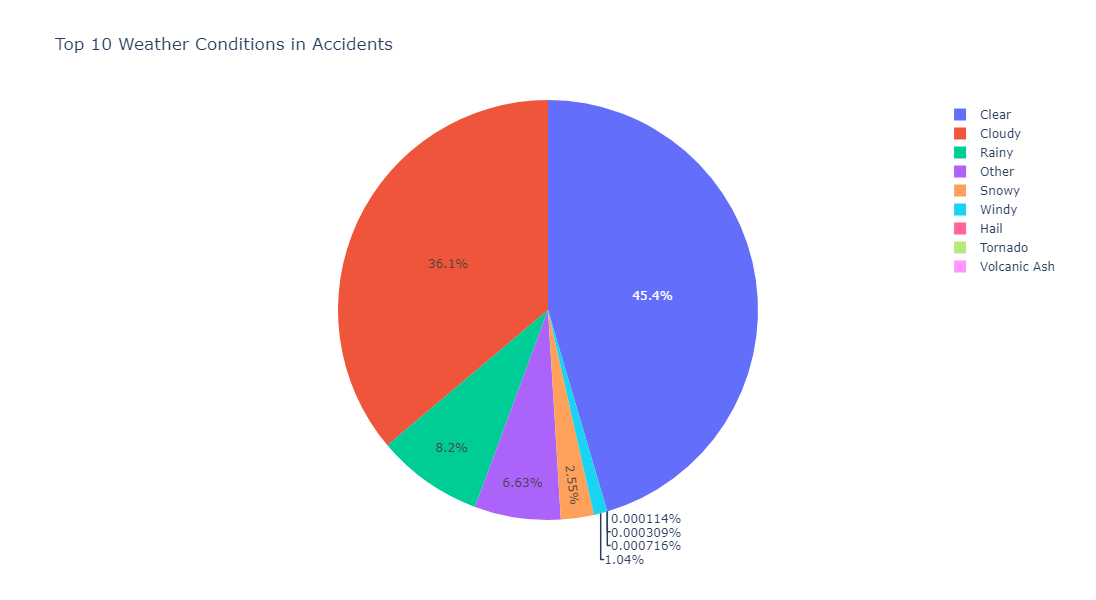

Chart created and displayed.
Chart saved as 'weather_conditions_pie_chart.html'


In [38]:
chunk_size = 100000 
weather_counts = {}

total_chunks = sum(1 for _ in pd.read_csv('goldlayerUSAccidents.csv', chunksize=chunk_size))

for chunk_number, chunk in enumerate(tqdm(pd.read_csv('goldlayerUSAccidents.csv', chunksize=chunk_size), total=total_chunks, desc="Processing chunks")):
    
    temp_counts = chunk['Weather_Bin'].value_counts()
    for condition, count in temp_counts.items():
        weather_counts[condition] = weather_counts.get(condition, 0) + count
    if (chunk_number + 1) % 10 == 0:
        print(f"Processed {chunk_number + 1} chunks out of {total_chunks}")

print("Finished processing all chunks. Creating chart...")
top_10_weather = sorted(weather_counts.items(), key=lambda x: x[1], reverse=True)[:10]
conditions, counts = zip(*top_10_weather)
fig = go.Figure(data=[go.Pie(labels=conditions, values=counts)])
fig.update_layout(
    title='Top 10 Weather Conditions in Accidents',
    height=600,
    width=800)

fig.show()
print("Chart created and displayed.")
print("Chart saved as 'weather_conditions_pie_chart.html'")

<h1 style="color:red;">Accident Severity, Counts and Duration</h1>
<h2 style="color:blue;">LINE PLOT</h2>

Processing chunks:  16%|█▌        | 10/62 [00:13<01:17,  1.49s/it]

Processed 10 chunks out of 62


Processing chunks:  32%|███▏      | 20/62 [00:27<00:54,  1.31s/it]

Processed 20 chunks out of 62


Processing chunks:  48%|████▊     | 30/62 [00:41<00:45,  1.41s/it]

Processed 30 chunks out of 62


Processing chunks:  65%|██████▍   | 40/62 [00:57<00:31,  1.43s/it]

Processed 40 chunks out of 62


Processing chunks:  81%|████████  | 50/62 [01:12<00:16,  1.39s/it]

Processed 50 chunks out of 62


Processing chunks:  97%|█████████▋| 60/62 [01:25<00:02,  1.30s/it]

Processed 60 chunks out of 62


Processing chunks: 100%|██████████| 62/62 [01:27<00:00,  1.41s/it]

Finished processing all chunks. Creating chart...


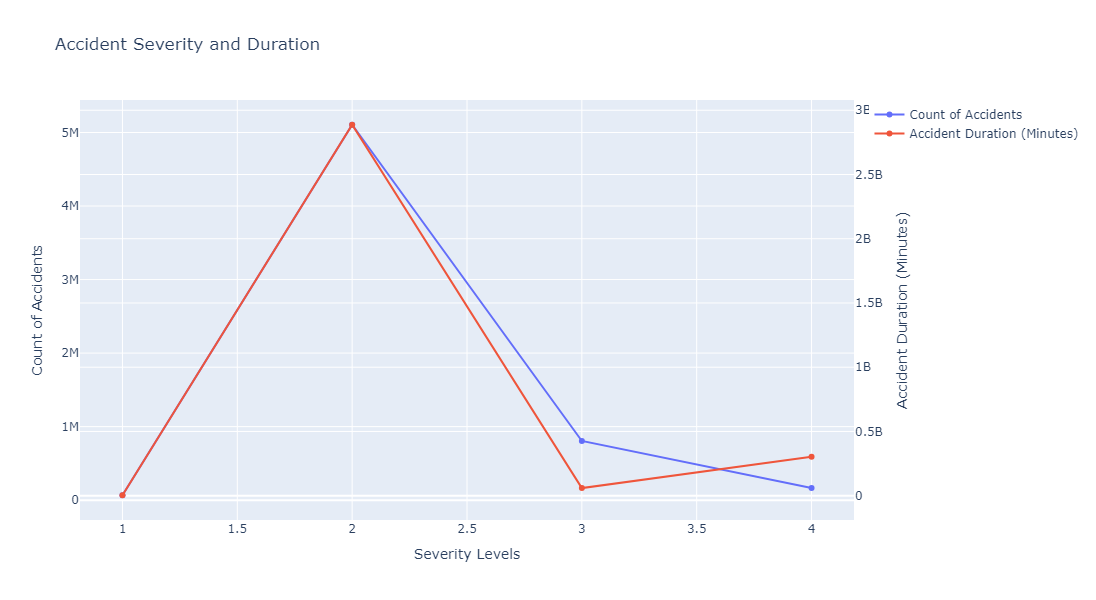

In [40]:
chunk_size = 100000
severity_counts = {}
accident_duration_sums = {}

total_chunks = sum(1 for _ in pd.read_csv('goldlayerUSAccidents.csv', chunksize=chunk_size))
for chunk_number, chunk in enumerate(tqdm(pd.read_csv('goldlayerUSAccidents.csv', chunksize=chunk_size), total=total_chunks, desc="Processing chunks")):
    chunk['Start_Time'] = pd.to_datetime(chunk['Start_Time'])
    chunk['End_Time'] = pd.to_datetime(chunk['End_Time'])
    chunk['Accident_Duration'] = (chunk['End_Time'] - chunk['Start_Time']).dt.total_seconds() / 60
    
    severity_group = chunk.groupby('Severity').agg({
        'Accident_Duration': 'sum', 
        'ID': 'count'})
    
    for severity, data in severity_group.iterrows():
        severity_counts[severity] = severity_counts.get(severity, 0) + data['ID']
        accident_duration_sums[severity] = accident_duration_sums.get(severity, 0) + data['Accident_Duration']
    
    if (chunk_number + 1) % 10 == 0:
        print(f"Processed {chunk_number + 1} chunks out of {total_chunks}")

print("Finished processing all chunks. Creating chart...")

severity_levels = sorted(severity_counts.keys())
counts = [severity_counts[sev] for sev in severity_levels]
durations = [accident_duration_sums[sev] for sev in severity_levels]

fig = go.Figure()
fig.add_trace(go.Scatter(x=severity_levels, y=counts, mode='lines+markers', name='Count of Accidents'))
fig.add_trace(go.Scatter(x=severity_levels, y=durations, mode='lines+markers', name='Accident Duration (Minutes)', yaxis='y2'))

fig.update_layout(
    title='Accident Severity and Duration',
    xaxis_title='Severity Levels',
    yaxis_title='Count of Accidents',
    yaxis2=dict(
        title='Accident Duration (Minutes)',
        overlaying='y',
        side='right'
    ),
    height=600,
    width=800
)

fig.show()
